In [19]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.set_option('display.max_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

In [21]:
forma = wec.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 17432 filas y 122 columnas'

In [22]:
dupl = wec.duplicated()
print(dupl.value_counts())

False    17432
dtype: int64


In [23]:
print(wec.columns)

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption',
       'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh',
       'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity',
       'wind_electricity', 'energ

In [24]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values = wec.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values

biofuel_cons_change_pct                    16913
carbon_intensity_elec                      16844
solar_cons_change_pct                      16107
nuclear_cons_change_pct                    15910
wind_cons_change_pct                       15889
other_renewables_cons_change_pct           15106
hydro_cons_change_pct                      13768
gas_cons_change_pct                        13728
coal_cons_change_pct                       13670
renewables_cons_change_pct                 13604
low_carbon_cons_change_pct                 13597
biofuel_elec_per_capita                    13243
fossil_cons_change_pct                     13231
oil_cons_change_pct                        13231
oil_cons_change_twh                        13231
fossil_cons_change_twh                     13231
biofuel_share_elec                         13226
low_carbon_cons_change_twh                 13225
coal_cons_change_twh                       13225
nuclear_cons_change_twh                    13225
other_renewables_con

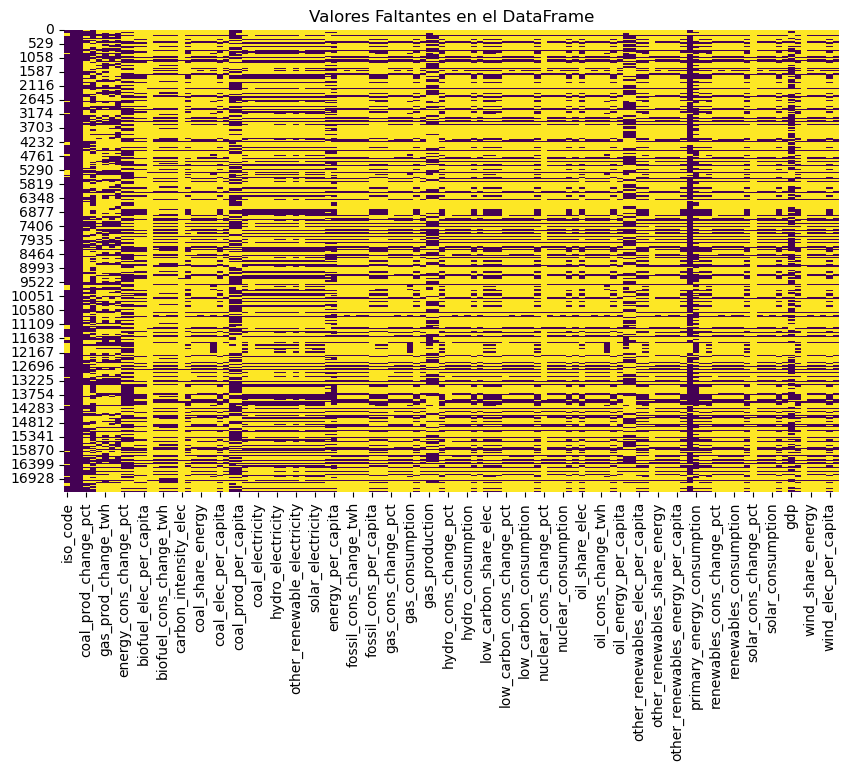

In [25]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [26]:
# Creamos un nuevo dataframe solo con países de sudamerica
suram = wec[(wec['iso_code'] == "ARG") | (wec['iso_code'] == "ECU") | (wec['iso_code'] == "GUY") | (wec['iso_code'] == "PER") | (wec['iso_code'] == "GUF") |(wec['iso_code'] == "URY") | (wec['iso_code'] == "PRY") | (wec['iso_code'] == "BOL")  | (wec['iso_code'] == "SUR")  | (wec['iso_code'] == "TTO") | (wec['iso_code'] == "BRA")| (wec['iso_code'] == "CHL") | (wec['iso_code'] == "COL") | (wec['iso_code'] == "VEN")]

In [27]:
suram.shape ## Se verifica la cantidad de fila

(1302, 122)

In [28]:
suram.select_dtypes(include=np.number)

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
680,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4756635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.311303e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,1901,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4929644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.404338e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,1902,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [29]:
n_suram = suram.select_dtypes(include=np.number)

In [30]:
a = n_suram.groupby(["iso_code"]).mean()
a

KeyError: 'iso_code'

In [ ]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values_suram = suram.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values_suram.groupby(["iso_code"])

KeyError: 'iso_code'

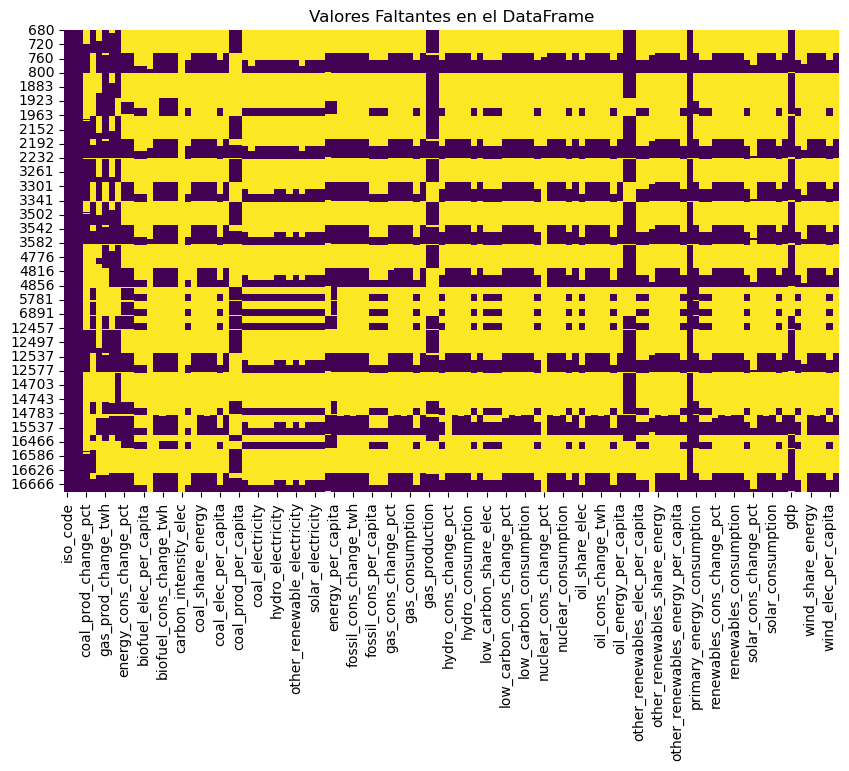

In [ ]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(suram.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [36]:
# Se realiza el tratamiento de los valores nulos
nulls = wec.isna().sum()
for i in nulls.index:
        if nulls[i] > 0:wec[i].ffill(inplace=True)
        wec[i].bfill(inplace=True)
wec.isna().sum()

iso_code                                   0
country                                    0
year                                       0
coal_prod_change_pct                       0
coal_prod_change_twh                       0
gas_prod_change_pct                        0
gas_prod_change_twh                        0
oil_prod_change_pct                        0
oil_prod_change_twh                        0
energy_cons_change_pct                     0
energy_cons_change_twh                     0
biofuel_share_elec                         0
biofuel_elec_per_capita                    0
biofuel_cons_change_pct                    0
biofuel_share_energy                       0
biofuel_cons_change_twh                    0
biofuel_consumption                        0
biofuel_cons_per_capita                    0
carbon_intensity_elec                      0
coal_share_elec                            0
coal_cons_change_pct                       0
coal_share_energy                          0
coal_cons_

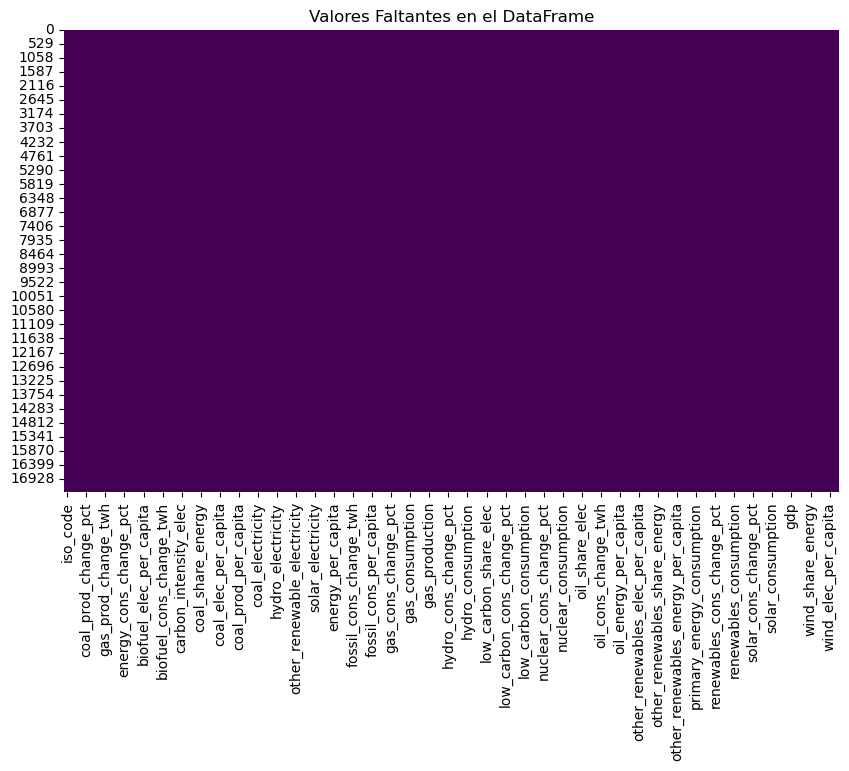

In [37]:
#visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()





Cálculo de nulos iniciales: nulls = df.isna().sum() calcula la cantidad de valores nulos en cada columna y almacena esos conteos en la serie nulls.

Iteración sobre columnas con nulos: `for ifor i in nulls.index:itera sobre las columnas

Comprobación de nulos: `if nulls[i] > 0:verifica si la columna `iiTiene al menos un valor nulo.

Propagación hacia adelante ( ffill): `df[i].ffdf[i].ffill(inplace=True)utiliza laicon elinplace=Truesignifica que los cambios se aplican

Propagación hacia atrás ( bfill):`df[yo].df[i].bfill(inplace=True)utiliza la propagacion haciaiestafainplace=Trueindica que los cambios se aplican

Verificación de nulos después del tratamiento:`df.isna().df.isna().sum()recalcula la cantidad de valores

## Columns and their description
column 	description
iso_code 	ISO 3166-1 alpha-3 three-letter country codes
country 	Geographic location
year 	Year of observation
coal_prod_change_pct 	Annual percentage change in coal production
coal_prod_change_twh 	Annual change in coal production, measured in terawatt-hours
gas_prod_change_pct 	Annual percentage change in gas production
gas_prod_change_twh 	Annual change in gas production, measured in terawatt-hours
oil_prod_change_pct 	Annual percentage change in oil production
oil_prod_change_twh 	Annual change in oil production, measured in terawatt-hours
energy_cons_change_pct 	Annual percentage change in primary energy consumption
energy_cons_change_twh 	Annual change in primary energy consumption, measured in terawatt-hours
biofuel_share_elec 	Share of electricity consumption that comes from biofuels
biofuel_cons_change_pct 	Annual percentage change in biofuel consumption
biofuel_share_energy 	Share of primary energy consumption that comes from biofuels
biofuel_cons_change_twh 	Annual change in biofuel consumption, measured in terawatt-hours
biofuel_consumption 	Primary energy consumption from biofuels, measured in terawatt-hours
biofuel_elec_per_capita 	Per capita electricity consumption from biofuels, measured in kilowatt-hours
biofuel_cons_per_capita 	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
carbon_intensity_elec 	Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_share_elec 	Share of electricity consumption that comes from coal
coal_cons_change_pct 	Annual percentage change in coal consumption
coal_share_energy 	Share of primary energy consumption that comes from coal
coal_cons_change_twh 	Annual change in coal consumption, measured in terawatt-hours
coal_consumption 	Primary energy consumption from coal, measured in terawatt-hours
coal_elec_per_capita 	Per capita electricity consumption from coal, measured in kilowatt-hours
coal_cons_per_capita 	Per capita primary energy consumption from coal, measured in kilowatt-hours
coal_production 	Coal production, measured in terawatt-hours
coal_prod_per_capita 	Per capita coal production, measured in kilowatt-hours
electricity_generation 	Electricity generation, measured in terawatt-hours
biofuel_electricity 	Electricity generation from biofuels, measured in terawatt-hours
coal_electricity 	Electricity generation from coal, measured in terawatt-hours
fossil_electricity 	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity 	Electricity generation from gas, measured in terawatt-hours
hydro_electricity 	Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity 	Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity 	Electricity generation from oil, measured in terawatt-hours
other_renewable_electricity 	Electricity generation from other renewable sources, measured in terawatt-hours
other_renewable_exc_biofuel_electricity 	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours
renewables_electricity 	Electricity generation from renewables, measured in terawatt-hours
solar_electricity 	Electricity generation from solar, measured in terawatt-hours
wind_electricity 	Electricity generation from wind, measured in terawatt-hours
energy_per_gdp 	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
energy_per_capita 	Primary energy consumption per capita, measured in kilowatt-hours per year
fossil_cons_change_pct 	Annual percentage change in fossil fuel consumption
fossil_share_energy 	Share of primary energy consumption that comes from fossil fuels
fossil_cons_change_twh 	Annual change in fossil fuel consumption, measured in terawatt-hours
fossil_fuel_consumption 	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_energy_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_cons_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_share_elec 	Share of electricity consumption that comes from fossil fuels (coal, oil and gas combined)
gas_share_elec 	Share of electricity consumption that comes from gas
gas_cons_change_pct 	Annual percentage change in gas consumption
gas_share_energy 	Share of primary energy consumption that comes from gas
gas_cons_change_twh 	Annual change in gas consumption, measured in terawatt-hours
gas_consumption 	Primary energy consumption from gas, measured in terawatt-hours
gas_elec_per_capita 	Per capita electricity consumption from gas, measured in kilowatt-hours
gas_energy_per_capita 	Per capita primary energy consumption from gas, measured in kilowatt-hours
gas_production 	Gas production, measured in terawatt-hours
gas_prod_per_capita 	Per capita gas production, measured in kilowatt-hours
hydro_share_elec 	Share of electricity consumption that comes from hydropower
hydro_cons_change_pct 	Annual percentage change in hydropower consumption
hydro_share_energy 	Share of primary energy consumption that comes from hydropower
hydro_cons_change_twh 	Annual change in hydropower consumption, measured in terawatt-hours
hydro_consumption 	Primary energy consumption from hydropower, measured in terawatt-hours
hydro_elec_per_capita 	Per capita electricity consumption from hydropower, measured in kilowatt-hours
hydro_energy_per_capita 	Per capita primary energy consumption from hydropower, measured in kilowatt-hours
low_carbon_share_elec 	Share of electricity consumption that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear
low_carbon_electricity 	Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power
low_carbon_elec_per_capita 	Per capita electricity consumption from low-carbon sources, measured in kilowatt-hours
low_carbon_cons_change_pct 	Annual percentage change in low-carbon energy consumption
low_carbon_share_energy 	Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear
low_carbon_cons_change_twh 	Annual change in low-carbon energy consumption, measured in terawatt-hours
low_carbon_consumption 	Primary energy consumption from low-carbon sources, measured in terawatt-hours
low_carbon_energy_per_capita 	Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours
nuclear_share_elec 	Share of electricity consumption that comes from nuclear power
nuclear_cons_change_pct 	Annual percentage change in nuclear consumption
nuclear_share_energy 	Share of primary energy consumption that comes from nuclear power
nuclear_cons_change_twh 	Annual change in nuclear consumption, measured in terawatt-hours
nuclear_consumption 	Primary energy consumption from nuclear power, measured in terawatt-hours
nuclear_elec_per_capita 	Per capita electricity consumption from nuclear power, measured in kilowatt-hours
nuclear_energy_per_capita 	Per capita primary energy consumption from nuclear, measured in kilowatt-hours
oil_share_elec 	Share of electricity consumption that comes from oil
oil_cons_change_pct 	Annual percentage change in oil consumption
oil_share_energy 	Share of primary energy consumption that comes from oil
oil_cons_change_twh 	Annual change in oil consumption, measured in terawatt-hours
oil_consumption 	Primary energy consumption from oil, measured in terawatt-hours
oil_elec_per_capita 	Primary energy consumption from oil, measured in terawatt-hours
oil_energy_per_capita 	Per capita primary energy consumption from oil, measured in kilowatt-hours
oil_production 	Oil production, measured in terawatt-hours
oil_prod_per_capita 	Per capita oil production, measured in kilowatt-hours
other_renewables_elec_per_capita 	Per capita electricity consumption from other renewables, measured in kilowatt-hours
other_renewables_share_elec 	Share of electricity consumption that comes from other renewables
other_renewables_cons_change_pct 	Annual percentage change in energy consumption from other renewables
other_renewables_share_energy 	Share of primary energy consumption that comes from other renewables
other_renewables_cons_change_twh 	Annual change in other renewable consumption, measured in terawatt-hours
other_renewable_consumption 	Primary energy consumption from other renewables, measured in terawatt-hours
other_renewables_energy_per_capita 	Per capita primary energy consumption from other renewables, measured in kilowatt-hours
per_capita_electricity 	Electricity consumption per capita, measured in kilowatt-hours
population 	Total population
primary_energy_consumption 	Primary energy consumption, measured in terawatt-hours
renewables_elec_per_capita 	Per capita primary energy consumption from renewables, measured in kilowatt-hours
renewables_share_elec 	Share of electricity consumption that comes from renewables
renewables_cons_change_pct 	Annual percentage change in renewable energy consumption
renewables_share_energy 	Share of primary energy consumption that comes from renewables
renewables_cons_change_twh 	Annual change in renewable energy consumption, measured in terawatt-hours
renewables_consumption 	Primary energy consumption from renewables, measured in terawatt-hours
renewables_energy_per_capita 	Per capita electricity consumption from renewables, measured in kilowatt-hours
solar_share_elec 	Share of electricity consumption that comes from solar
solar_cons_change_pct 	Annual percentage change in solar consumption
solar_share_energy 	Share of primary energy consumption that comes from solar
solar_cons_change_twh 	Annual change in solar consumption, measured in terawatt-hours
solar_consumption 	Primary energy consumption from solar, measured in terawatt-hours
solar_elec_per_capita 	Per capita electricity consumption from solar, measured in kilowatt-hours
solar_energy_per_capita 	Per capita primary energy consumption from solar, measured in kilowatt-hours
gdp 	Total real gross domestic product, inflation-adjusted
wind_share_elec 	Share of electricity consumption that comes from wind
wind_cons_change_pct 	Annual percentage change in wind consumption
wind_share_energy 	Share of primary energy consumption that comes from wind
wind_cons_change_twh 	Annual change in wind consumption, measured in terawatt-hours
wind_consumption 	Primary energy consumption from wind, measured in terawatt-hours
wind_elec_per_capita 	Per capita electricity consumption from wind, measured in kilowatt-hours
wind_energy_per_capita 	Per capita primary energy consumption from wind, measured in kilowatt-hours

In [ ]:
graf = suram.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


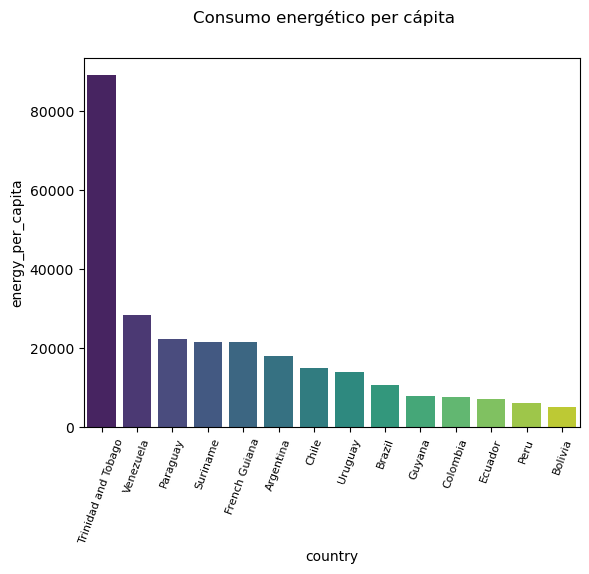

In [ ]:
sns.barplot(x='country', y="energy_per_capita", data=graf, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [ ]:
# filtro de paises
paises = ['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India', "Argentina", "Brazil", "Chile", "Bolivia"]
#filter columns
seleccion =wec.loc[wec['country'].isin(paises)]

In [ ]:
seleccion.shape

(1385, 122)

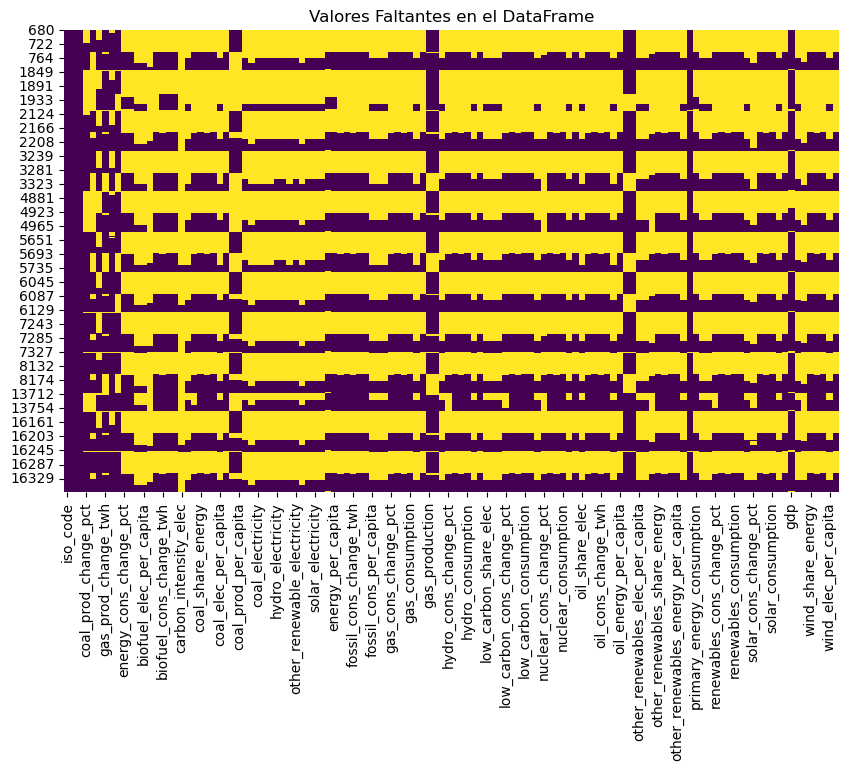

In [ ]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(seleccion.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [ ]:
graf2 = seleccion.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


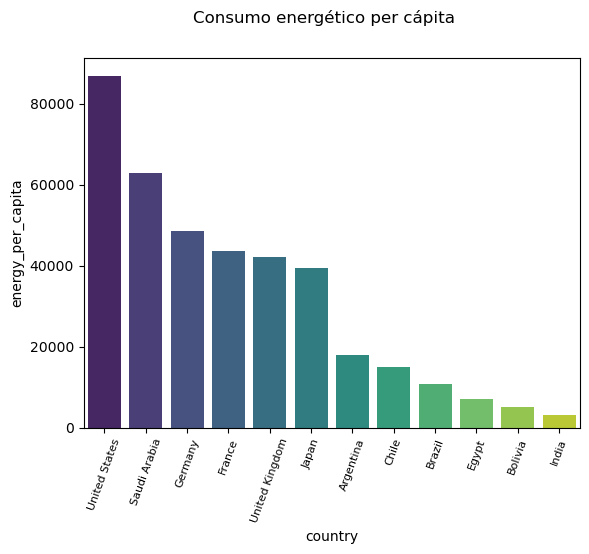

In [ ]:
sns.barplot(x='country', y="energy_per_capita", data=graf2, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [ ]:
nulls=suram.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        suram[i].ffill(inplace=True)
        suram[i].bfill(inplace=True)
suram.isna().sum()


C:\Users\Luna\AppData\Local\Temp\ipykernel_15296\1886935284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suram[i].ffill(inplace=True)
C:\Users\Luna\AppData\Local\Temp\ipykernel_15296\1886935284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suram[i].bfill(inplace=True)


iso_code                                      0
country                                       0
year                                          0
coal_prod_change_pct                          0
coal_prod_change_twh                          0
gas_prod_change_pct                           0
gas_prod_change_twh                           0
oil_prod_change_pct                           0
oil_prod_change_twh                           0
energy_cons_change_pct                        0
energy_cons_change_twh                        0
biofuel_share_elec                            0
biofuel_elec_per_capita                       0
biofuel_cons_change_pct                       0
biofuel_share_energy                          0
biofuel_cons_change_twh                       0
biofuel_consumption                           0
biofuel_cons_per_capita                       0
carbon_intensity_elec                      1302
coal_share_elec                               0
coal_cons_change_pct                    

In [ ]:
nulls=suram.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        suram[i].ffill(inplace=True)
        suram[i].bfill(inplace=True)
suram.isna().sum()


C:\Users\Luna\AppData\Local\Temp\ipykernel_15296\1886935284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suram[i].ffill(inplace=True)
C:\Users\Luna\AppData\Local\Temp\ipykernel_15296\1886935284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suram[i].bfill(inplace=True)


iso_code                                      0
country                                       0
year                                          0
coal_prod_change_pct                          0
coal_prod_change_twh                          0
gas_prod_change_pct                           0
gas_prod_change_twh                           0
oil_prod_change_pct                           0
oil_prod_change_twh                           0
energy_cons_change_pct                        0
energy_cons_change_twh                        0
biofuel_share_elec                            0
biofuel_elec_per_capita                       0
biofuel_cons_change_pct                       0
biofuel_share_energy                          0
biofuel_cons_change_twh                       0
biofuel_consumption                           0
biofuel_cons_per_capita                       0
carbon_intensity_elec                      1302
coal_share_elec                               0
coal_cons_change_pct                    

Recursos:
https://www.gem.wiki/Energy_profile:_Trinidad_and_Tobago
https://ourworldindata.org/energy/country/trinidad-and-tobago#per-capita-what-is-the-average-energy-consumption-per-person